In [27]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Append the absolute path of the root directory of the project
notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, '..', '..'))

# Add the root directory to sys.path
sys.path.append(project_root)

# Import project modules
from src.config import TEST_DIR
from src.data.preprocess import DataPreprocessor
from src.models.train_model import ModelTrainer
from src.models.predict_model import ModelPredictor

In [28]:
# 1. Load and preprocess the data
preprocessor = DataPreprocessor(TEST_DIR)
preprocessor.clean_data()
preprocessor.split_data(test_size=0.2)

print(f"Training set size: {len(preprocessor.X_train)}")
print(f"Test set size: {len(preprocessor.X_test)}")

Training set size: 3876
Test set size: 970


In [43]:
# Example notebook usage
trainer = ModelTrainer()
model = trainer.train_neural_network(preprocessor.X_train, preprocessor.y_train, 
                                    preprocessor.X_test, preprocessor.y_test, 
                                    epochs=5, batch_size=32)

# Access training history
history = trainer.training_history
epochs = trainer.training_epochs

Returning zero embedding matrix. Please download GloVe embeddings.
Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.5737 - loss: 0.9843 - val_accuracy: 0.5938 - val_loss: 0.9281
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.6056 - loss: 0.9195 - val_accuracy: 0.5938 - val_loss: 0.9269
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.5928 - loss: 0.9374 - val_accuracy: 0.5938 - val_loss: 0.9260
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.5918 - loss: 0.9353 - val_accuracy: 0.5938 - val_loss: 0.9261
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.5931 - loss: 0.9326 - val_accuracy: 0.5938 - val_loss: 0.9263


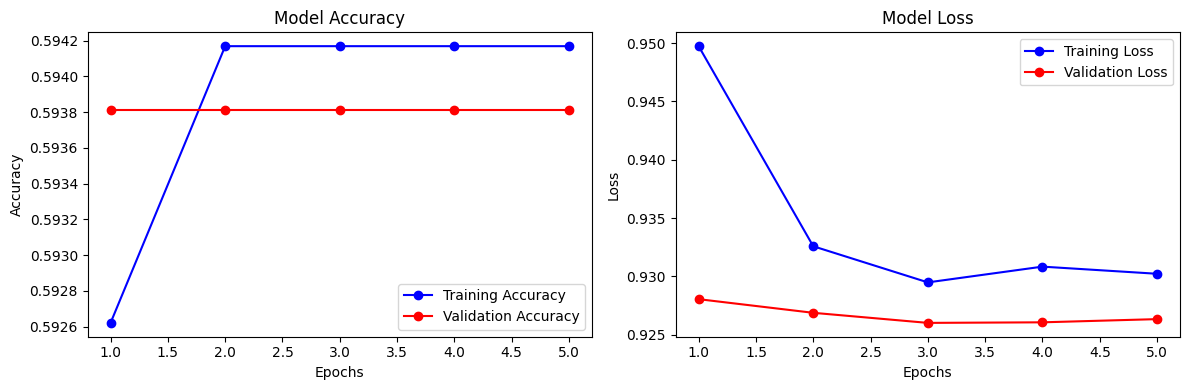

In [44]:
# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 4. Make predictions
predictor = ModelPredictor()
pred_probs, pred_labels = predictor.predict_neural_network(preprocessor.X_test, trainer)

In [ ]:
# 5. Evaluate the model
print("\nNeural Network Model Evaluation:")
sentiments = preprocessor.label_encoder.classes_
report = classification_report(
    preprocessor.y_test, 
    pred_labels, 
    target_names=sentiments
)
print(report)

In [ ]:
# 6. Plot confusion matrix
cm = confusion_matrix(preprocessor.y_test, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=sentiments, 
    yticklabels=sentiments
)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Try making predictions on new data
# Example with a few sample headlines
sample_headlines = [
    "Company reports record profits in Q1",
    "Stock market crashes amid economic uncertainty",
    "New product launch exceeds expectations"
]

In [ ]:
# Preprocess and vectorize the new data
sample_clean = [preprocessor.clean_text(headline) for headline in sample_headlines]
sample_vec = vectorizer.transform(sample_clean)

# Predict
sample_probs, sample_labels = predictor.predict_neural_network(sample_vec, trainer)

# Display results
for headline, sentiment in zip(sample_headlines, sample_labels):
    print(f"Headline: {headline}")
    print(f"Predicted sentiment: {sentiment}\n")